# DS 3000 - Assignment 3

**Student Name**: Bella Chin

**Date**: 09/18/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [3]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [4]:
import pandas as pd

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [6]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [8]:
# inspect the dimensions
print('There are {} rows and {} columns.'.format(tripdata_df.shape[0], tripdata_df.shape[1]))

# view samples of the data
tripdata_df.head()

#indicate if variables have suitable types
print("Some of the variables do not have suitable types.",
"For example, passenger_count was previously a float, however, people cannot be a decimal number.",
      "Below, I have written the code to convert the variables to suitable types and printed the types of the variables after.\n")
print("Data types of variables before converting:\n", tripdata_df.dtypes)
# Convert the fields to best possible type 
tripdata_df = tripdata_df.convert_dtypes()

#Convert fields to its most suitable type based on my belief
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')
tripdata_df['ehail_fee'] = tripdata_df['ehail_fee'].astype('Float64')


tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('Int64')

# Verifying the change of variables occurred
print("Data types of variables after converting:\n",tripdata_df.dtypes)


There are 64809 rows and 20 columns.
Some of the variables do not have suitable types. For example, passenger_count was previously a float, however, people cannot be a decimal number. Below, I have written the code to convert the variables to suitable types and printed the types of the variables after.

Data types of variables before converting:
 VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amoun

In [9]:
tripdata_df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1,74,265,1,10.8,42.9,1.0,1.5,0.0,0.0,<NA>,1.0,45.4,2,1,0.0
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1,216,196,1,4.76,23.3,1.0,0.5,0.0,0.0,<NA>,1.0,25.8,2,1,0.0
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1,7,114,1,6.32,30.3,1.0,0.5,8.89,0.0,<NA>,1.0,44.44,1,1,2.75
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1,74,239,1,3.5,16.3,1.0,0.5,0.0,0.0,<NA>,1.0,21.55,2,1,2.75
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1,82,223,1,3.14,17.0,1.0,0.5,0.0,0.0,<NA>,1.0,19.5,2,1,0.0


In [10]:
# see if data is represented correctly
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  category      
 1   lpep_pickup_datetime   64809 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  category      
 4   RatecodeID             59988 non-null  category      
 5   PULocationID           64809 non-null  Int64         
 6   DOLocationID           64809 non-null  Int64         
 7   passenger_count        59988 non-null  Int64         
 8   trip_distance          64809 non-null  Float64       
 9   fare_amount            64809 non-null  Float64       
 10  extra                  64809 non-null  Float64       
 11  mta_tax                64809 non-null  Float64       
 12  tip_amount             64809 non-null  Float64       
 13  t

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

There are categorical data in this data set.RatecodeID and VendorID are examples of categorical data in the dataset. VendorID is a nominal categorical data type because it contains two different values indicating the LPEP provider, but there is no inherent order between these two categories. For example, in the sample of the data below, VendorID either has a 1 or a 2, with both being a LPEP provider but just different companies. RatecodeID is an example of a nominal categorical data type because although it indicates different types of rates for different types of rides, there is no inherent order between the categories for the rates. 



In [13]:
print("Categories of RatecodeID:",tripdata_df['RatecodeID'].head().unique())
print("Categories of VendorID:",tripdata_df['VendorID'].head().unique())

Categories of RatecodeID: [1]
Categories (7, Int64): [1, 2, 3, 4, 5, 6, 99]
Categories of VendorID: [1, 2]
Categories (2, Int64): [1, 2]


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

1. The code below checks the frequency of missing values within the dataframe. This output shows that store_and_fwd_flag, RatecodeID, passenger_count, ehail_fee, payment_type, trip_type, and congestion_surcharge has a lot of missing values. Ehail_fee is missing all of its values when you check it with the data size. Comparatively, store_and_fwd_flag, RatecodeID, passenger_count, payment_type, and congestion_surcharge is missing around 7% of its data in the dataframe. So, ehail_fee is a widespread issue and the rest is an isolated case.

In [16]:
# check frequency of null values in each column
print(tripdata_df.isnull().sum())

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4821
RatecodeID                4821
PULocationID                 0
DOLocationID                 0
passenger_count           4821
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64809
improvement_surcharge        0
total_amount                 0
payment_type              4821
trip_type                 4826
congestion_surcharge      4821
dtype: int64


2. The method I would recommend to handle missing data is deletion for ehail_fee because we want to remove any rows from the data frame since there is a widespread issue of missing values and ehail_fee is missing all of its values from the dataframe. For the other variables, I would recommend imputation since only about 7% of the data is missing compared to ehail_fee.

In [18]:
# handle missing data -- deletion
tripdata_df = tripdata_df.drop('ehail_fee', axis = 1)

#handle missing data that we need -- imputation
missingList = ['trip_type','store_and_fwd_flag','RatecodeID','passenger_count','payment_type','congestion_surcharge']
# check the most frequently occuring category
for type in missingList:
    print(tripdata_df[type].value_counts(dropna=False))

#change the missing data to the most frequent occuring category
for var in missingList:
    tripdata_df[var] = tripdata_df[var].fillna(tripdata_df[var].mode()[0])

# check the size of the data frame after removing missing values
print(tripdata_df.shape)

#check the frequency of missing values after removing them
print(tripdata_df.isnull().sum())

trip_type
1      58270
NaN     4826
2       1713
Name: count, dtype: int64
store_and_fwd_flag
N       59779
<NA>     4821
Y         209
Name: count, dtype: int64
RatecodeID
1      57911
NaN     4821
5       1828
2        154
4         51
3         38
99         5
6          1
Name: count, dtype: int64
passenger_count
1       51310
<NA>     4821
2        4671
5        1559
3         896
6         895
0         370
4         282
8           2
7           2
9           1
Name: count, dtype: Int64
payment_type
1      38549
2      20844
NaN     4821
3        481
4        114
Name: count, dtype: int64
congestion_surcharge
 0.0     43973
 2.75    16009
 <NA>     4821
-2.75        4
 2.5         2
Name: count, dtype: Int64
(64809, 19)
VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount         

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found. **`NOTE`: The issues that you found should not include any aspects from the previous questions.**
2. write suitable code to handle the invalid data that you found.

In [20]:
# give summary statistics
print(tripdata_df.describe())

             lpep_pickup_datetime       lpep_dropoff_datetime  PULocationID  \
count                       64809                       64809       64809.0   
mean   2023-02-14 19:27:48.982888  2023-02-14 19:45:33.676680     99.988273   
min           2008-12-31 23:02:29         2009-01-01 16:41:01           1.0   
25%           2023-02-07 22:34:54         2023-02-07 23:01:51          74.0   
50%           2023-02-14 19:24:38         2023-02-14 19:40:34          75.0   
75%           2023-02-21 21:36:21         2023-02-21 21:52:19         129.0   
max           2023-03-01 00:01:06         2023-03-01 16:51:02         265.0   
std                           NaN                         NaN       61.7118   

       DOLocationID  passenger_count  trip_distance  fare_amount     extra  \
count       64809.0          64809.0        64809.0      64809.0   64809.0   
mean     139.065809         1.272863      13.696354    16.646276   0.84427   
min             1.0              0.0            0.0   

1. One issue I found of invalid data is fare_amount. Fare_amount cannot be a negative amount since it is how much it costs for the time and distance of a trip. Another issue I found of invalid data is the tip_amount. Tip_amount cannot be a negative amount as well because tip is an extra amount a customer pays if they like the service, it cannot be below 0. Additionally, another issue I found is the extra column. In one of the rows for the extra column, the amount is negative. However, extra cannot be negative because it is a miscellaneous extra and surcharge, meaning the least it could be is 0 and fees would be added if anything extra was needed.

In [22]:
# handling invalid data
invalidList = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
for invalid in invalidList:
    tripdata_df = tripdata_df[tripdata_df[invalid]>= 0]

# checking if invalid data was handled; the min which used to be negative is now corrected
print(tripdata_df.describe())


             lpep_pickup_datetime       lpep_dropoff_datetime  PULocationID  \
count                       64621                       64621       64621.0   
mean   2023-02-14 19:25:30.876975  2023-02-14 19:43:18.025580     99.966451   
min           2008-12-31 23:02:29         2009-01-01 16:41:01           1.0   
25%           2023-02-07 22:27:11         2023-02-07 22:55:00          74.0   
50%           2023-02-14 19:23:00         2023-02-14 19:39:45          75.0   
75%           2023-02-21 21:33:01         2023-02-21 21:46:54         129.0   
max           2023-03-01 00:01:06         2023-03-01 16:51:02         265.0   
std                           NaN                         NaN     61.699485   

       DOLocationID  passenger_count  trip_distance  fare_amount     extra  \
count       64621.0          64621.0        64621.0      64621.0   64621.0   
mean     139.153557         1.272404      13.735209    16.711824  0.849218   
min             1.0              0.0            0.0   

<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

Axes(0.125,0.11;0.775x0.77)
This bar chart shows the different trip types that New Yorkers used. The two different trip types they used were requesting or hailing a cab. The bar chart shows that mostly all New Yorkers street hailed a cab rather than dispatching a cab.


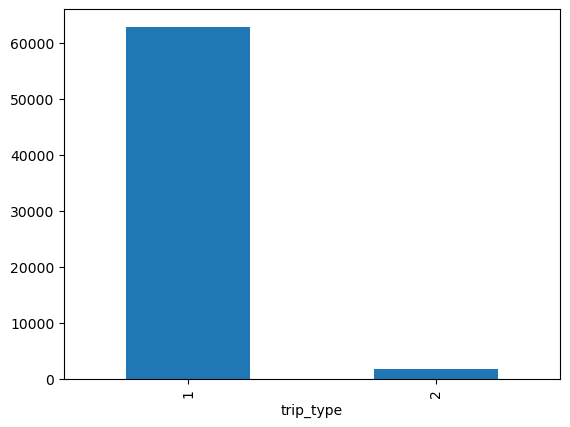

In [25]:
# bar chart for ways New Yorkers requested/hailed a cab
print(tripdata_df['trip_type'].value_counts().plot(kind = 'bar'))
print("This bar chart shows the different trip types that New Yorkers used.",
      "The two different trip types they used were requesting or hailing a cab."
      , "The bar chart shows that mostly all New Yorkers street hailed a cab rather than dispatching a cab.")

Axes(0.125,0.11;0.775x0.77)
74 : Manhattan East Harlem North Boro Zone; 75 : Manhattan East Harlem South Boro Zone; 166 : Brooklyn Midwood Boro Zone; 41 : Manhattan Central Harlem Boro Zone; 95 : Queens Forest Hills Boro Zone
This bar chart shows that the most common pick up zone is in East Harlem North in Manhattan and the least common out of the top 5 common pick up zone is in Queens Forest Hills.


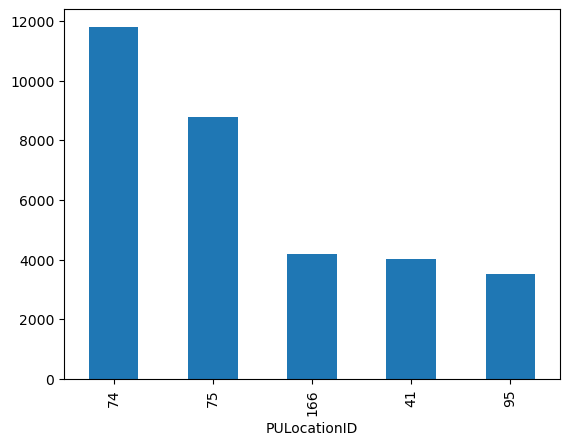

In [26]:
# show locations for most pickup
print(tripdata_df['PULocationID'].value_counts().head(5).plot(kind = 'bar'))
print(74, ": Manhattan East Harlem North Boro Zone;", 75, ": Manhattan East Harlem South Boro Zone;", 166,": Brooklyn Midwood Boro Zone;", 
41, ": Manhattan Central Harlem Boro Zone;", 95,": Queens Forest Hills Boro Zone")

print("This bar chart shows that the most common pick up zone is in East Harlem North in Manhattan and the least common out of the",
      "top 5 common pick up zone is in Queens Forest Hills.")

Axes(0.125,0.11;0.775x0.77)
74 : Manhattan East Harlem North Boro Zone; 75 : Manhattan East Harlem South Boro Zone; 236 Manhattan Upper East Side North Yellow Zone 41 : Manhattan Central Harlem Boro Zone; 42 Manhattan Central Harlem North Boro Zone
This bar chart shows that the most common drop off zone is the same as the most common pickup zine being Manhattan East Harlem North Boro Zone and the least common out of the most common 5 drop off zone is Central Harlem.


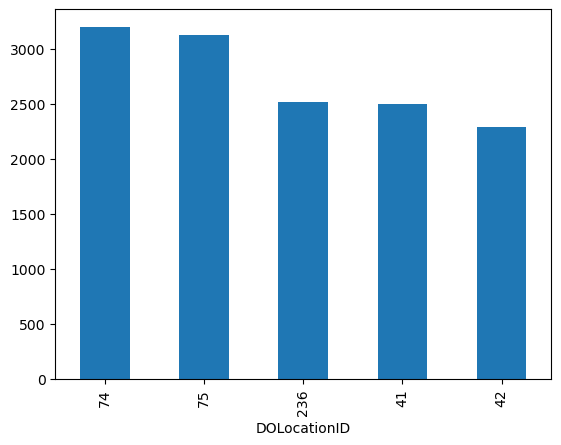

In [27]:
# the top 5 locations for drop off
print(tripdata_df['DOLocationID'].value_counts().head(5).plot(kind = 'bar'))
print(74, ": Manhattan East Harlem North Boro Zone;", 75, ": Manhattan East Harlem South Boro Zone;", 236,"Manhattan Upper East Side North Yellow Zone", 
41, ": Manhattan Central Harlem Boro Zone;", 42,"Manhattan Central Harlem North Boro Zone")
print("This bar chart shows that the most common drop off zone is the same as the most common pickup zine being Manhattan East Harlem",
"North Boro Zone and the least common out of the most common 5 drop off zone is Central Harlem.")

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [29]:
# calculate the average of how far NYers usually travel
average = tripdata_df['trip_distance'].mean()
print("On average, New Yorkers usually travel" ,"{:.2f}".format(average), "miles using these taxis")

# calculate the most and least expensive trip
max = tripdata_df['total_amount'].max()
min = tripdata_df['total_amount'].min()
print("The most expensive trip cost $", "{:.2f}".format(max))
print("The least expensive trip cost $", "{:.2f}".format(min))

# calculate the min, avg, and max tip amount for trips under 2 miles
maxTipUnder2 = tripdata_df[tripdata_df['trip_distance']<2]['tip_amount'].max()
print("The maximum tip for trips under 2 miles is $","{:.2f}".format(maxTipUnder2))

minTipUnder2 = tripdata_df[tripdata_df['trip_distance']<2]['tip_amount'].min()
print("The minimum tip for trips under 2 miles is $","{:.2f}".format(minTipUnder2))

avgTipUnder2 = tripdata_df[tripdata_df['trip_distance']<2]['tip_amount'].mean()
print("The average tip for trips under 2 miles is $","{:.2f}".format(avgTipUnder2))

# calculate the min, avg, and max tip amount for trips over 2 miles
maxTipOver2 = tripdata_df[tripdata_df['trip_distance']>=2]['tip_amount'].max()
print("The maximum tip for trips over 2 miles is $","{:.2f}".format(maxTipOver2))

minTipOver2 = tripdata_df[tripdata_df['trip_distance']>=2]['tip_amount'].min()
print("The minimum tip for trips over 2 miles is $","{:.2f}".format(minTipOver2))

avgTipOver2 = tripdata_df[tripdata_df['trip_distance']>=2]['tip_amount'].mean()
print("The average tip for trips over 2 miles is $","{:.2f}".format(avgTipOver2))

print("New Yorkers generally do not travel that far using taxis as the average is 13.74 miles.",
      "There have been times where trips have been given where no amount was paid and",
      "there have been times where trips have been very expensive with the most expensive trip",
      "being $441 dollars. Generally, people don't tip taxi drivers a lot, with the average",
      "being $1.35 and the minimum being nothing. However, there have been times where people",
      "have tipped a great amount, with the maximum tip being $80. This is all under 2 miles though.",
      "Contrary to trips under 2 miles, trips over 2 miles generally receive a greater average of tips with it",
      "being $3.06. The maximum tip for trips over 2 miles is less than the maximum for trips under 2 miles.")

On average, New Yorkers usually travel 13.74 miles using these taxis
The most expensive trip cost $ 441.00
The least expensive trip cost $ 0.00
The maximum tip for trips under 2 miles is $ 80.00
The minimum tip for trips under 2 miles is $ 0.00
The average tip for trips under 2 miles is $ 1.35
The maximum tip for trips over 2 miles is $ 75.82
The minimum tip for trips over 2 miles is $ 0.00
The average tip for trips over 2 miles is $ 3.06
New Yorkers generally do not travel that far using taxis as the average is 13.74 miles. There have been times where trips have been given where no amount was paid and there have been times where trips have been very expensive with the most expensive trip being $441 dollars. Generally, people don't tip taxi drivers a lot, with the average being $1.35 and the minimum being nothing. However, there have been times where people have tipped a great amount, with the maximum tip being $80. This is all under 2 miles though. Contrary to trips under 2 miles, tri

## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

Based on the preliminary analysis, the data is a viable source and can be used by our team in the future to understand how New Yorkers use these taxis. The data is a viable source that can be used because I went through the data to clean it up properly in order to make it usable. Previously, there were great amounts of missing data, such as ehail_fee having 100% of its data missing from the data frame. As all of the data was missing and there was no way to impute it, I made the decision to remove it from the data frame. There were other variables that had missing variables but not at such a great percentage, in which, we were able to impute the data to the most frequently occuring one, in order to use these variables later on. There was also invalid data, in which there were negative amounts, in which I dealt with them in order to make the data a more viable source. Additionally, because our domain is just based on taxi rides and trip data, it is a more viable source that can be used as opposed to if we were dealong with medical data, since altering medical data could be life threatening.